In [9]:
# Cálculo de curva masa media.

import numpy as np
import pandas as pd

from scipy import spatial

from matplotlib import pyplot as plt

import geopandas as gpd
import shapely as shp

In [10]:
# Convertimos la estación hidrométrica en csv a un shapefile.

# Dirección de los datos.
#path = "../Material/Clases/Clase 16/"

# Nombre de la estacion.
#nombre_est = "Estacion_36080"

# Cargamos la lista de estaciones.
#Estaciones = pd.read_csv(path + nombre_est + ".csv")

# Creamos un punto con las coordenadas.
#Estaciones["geometry"] = None
#Estaciones["geometry"] = gpd.points_from_xy(
#    Estaciones["LONGITUD"], Estaciones["LATITUD"])

# Creamos un GeoDataFrame.
# Las coordenadas están en WGS84 EPSG:4326.
#Estaciones = gpd.GeoDataFrame(Estaciones, geometry = "geometry", crs = 4326)
# A coordenadas UTM 13N ESPSG:32613.
#CRS = 32613
#Estaciones = Estaciones.to_crs(CRS)

# Actualizamos x, y.
#Estaciones["x"] = Estaciones.centroid.x
#Estaciones["y"] = Estaciones.centroid.y

# Guardamos.
#Estaciones.to_file(path + nombre_est + ".shp")

# Datos.
#Estaciones

In [11]:
# Graficamos la estación hidrométrica.
#Estaciones.explore()

In [ ]:
# Dirección de los datos.
path = "../Material/Clases/Clase 16/"

# Directorio de curva masa.
dir_cm = "Curva masa/"
# Directorio de estaciones.
dir_clic = path + dir_cm + "CLICOM/"
# Contorno de las subcuencas.
subc_b_n   = dir_cm + "Resultados QGIS/Zona_36080.shp"
# Estaciones pluviométricas.
est_clic_n = dir_cm + "Estaciones_CLICOM.csv"
# Estaciones pluviográficas.
est_emas_n = dir_cm + "Estaciones_EMAS.csv"
# Precipitación de las estaciones pluviográficas.
est_emasp_n = dir_cm + "EMAS/Precipitacion_EMAS_10_MIN.csv"
est_somb_n  = dir_cm + "EMAS/SOMBRERETE_2013.csv"
# Estación hidrométrica.
est_hidro_n    = dir_cm + "Datos de entrada QGIS/Estacion_36080.shp"
 
# A coordenadas UTM 13N ESPSG:32613.
CRS = 32613

# Subcuencas.
# Subcuenca de aportación de la estación hidrométrica.
gdf_subc = gpd.read_file(path + subc_b_n)
# A coordenadas UTM 13N ESPSG:32613.
# Subcuencas individuales.
#gdf_RH36Dc = gpd.read_file(path + "RH36D/RH36Dc_subc.shp")
#gdf_RH36Dd = gpd.read_file(path + "RH36D/RH36Dd_subc.shp")
#gdf_RH36De = gpd.read_file(path + "RH36D/RH36De_subc.shp")
#gdf_RH36Df = gpd.read_file(path + "RH36D/RH36Df_subc.shp")
#gdf_RH36Dg = gpd.read_file(path + "RH36D/RH36Dg_subc.shp")
#gdf_RH36Dh = gpd.read_file(path + "RH36D/RH36Dh_subc.shp")
#gdf_subc = gpd.GeoDataFrame( pd.concat( [gdf_RH36Dc, gdf_RH36Dd,
#    gdf_RH36De, gdf_RH36Df, gdf_RH36Dg, gdf_RH36Dh
#    ] ) ).reset_index( drop = True )
gdf_subc = gdf_subc.to_crs(CRS)

# Estación hidrométrica.
gdf_hidro = gpd.read_file(path + est_hidro_n)
# A coordenadas UTM 13N ESPSG:32613.
gdf_hidro = gdf_hidro.to_crs(CRS)

# Estaciones pluviométricas.
df_clic = pd.read_csv(path + est_clic_n)
# Creamos un punto con las coordenadas.
df_clic["geometry"] = gpd.points_from_xy(
    df_clic["LONGITUD"], df_clic["LATITUD"] )
# Creamos un GeoDataFrame.
# Las coordenadas están en WGS84 EPSG:4326.
df_clic = gpd.GeoDataFrame(df_clic, geometry = "geometry", crs = 4326)
df_clic = df_clic.set_index("CLAVE")
# A coordenadas UTM 13N ESPSG:32613.
df_clic = df_clic.to_crs(CRS)
# Escogemos las estaciones relevantes.
# "" es una estación no relevante.
# '' es una estación sin datos en la fecha de interés-
df_clic = df_clic[~df_clic["ESTACION"].isin( [
    "VICENTE GUERRERO", "NARCISO MENDOZA", "TIERRA Y LIBERTAD",
    "AGUA NUEVA", "SIERRA VIEJA", "CHICHIMEQUILLAS", "EL PEÑASCO",
    "COLONIA GREVER PURISIMA SIFUENTES", "VALPARAISO", "CUEVA GRANDE",
    "JEREZ DE GARCIA SALINAS (DGE)", "SUCHIL", "FELIPE ANGELES",
    "MILPILLAS DE LA SIERRA", "PRESA SANTIAGO", "JIMENEZ DEL TEUL",
    'SAN FRANCISCO (DGE)', 'RANCHO GRANDE', 'COLONIA GONZALEZ ORTEGA',
    'EL ARENAL', 'SAN JUAN DE GUADALUPE (DGE)', 'SAN JOSE DE REYES',
    'SANTA CLARA', 'SAN MARCOS', 'SIMON BOLIVAR', 'CUAUHTEMOC'
   ] ) ]
# Actualizamos x, y.
df_clic["x"] = df_clic.centroid.x
df_clic["y"] = df_clic.centroid.y

# Estaciones pluviográficas. (EMAs)
df_emas = pd.read_csv(path + est_emas_n)
# Creamos un punto con las coordenadas.
df_emas["geometry"] = gpd.points_from_xy(
    df_emas["LONGITUD"], df_emas["LATITUD"] )
# Creamos un GeoDataFrame.
# Las coordenadas están en WGS84 EPSG:4326.
df_emas = gpd.GeoDataFrame(df_emas, geometry = "geometry", crs = 4326)
# A coordenadas UTM 13N ESPSG:32613.
df_emas = df_emas.to_crs(CRS)
# Actualizamos x, y.
df_emas["x"] = df_emas.centroid.x
df_emas["y"] = df_emas.centroid.y
# Escogemos las estaciones relevantes.
df_emas = df_emas[~df_emas["ESTACION"].isin( [
    "SIERRAFRIA", "PRESA50ANIV", "COLOTLAN", "LAMICHILIADGO", "ZACATECAS_EMA",
    "MATEHUALA", "AGUSTINMELGAR", "DURANGO","TORREON", "SALTILLO",
    #"ZACATECAS", "LAFLORIDASMN", "SOMBRERETE",
    "SANJUANDEGUADALUPE"
    ] ) ].reset_index( drop = True )

In [ ]:
# Graficamos y verificamos que las estaciones cubran toda la cuenca.

# Cobertura de las estaciones pluviométricas.
map = gpd.GeoSeries(df_clic.unary_union.convex_hull
    ).set_crs(df_clic.crs).explore(color = "yellow")
# Graficamos las subcuencas.
gdf_subc.explore(m = map)
# Graficamos las estaciones pluviométricas.
df_clic.explore(m = map, color = "green")
# Graficamos las estaciones pluviográficas.
df_emas.explore(m = map, color = "red")
# Graficamos la estación hidrométrica.
gdf_hidro.explore(m = map, color = "orange")

In [ ]:
# Polígonos de Thiessen
# Agregamos estaciones virtuales en los límites de la extensión de la cuenca.
# Alejamos los puntos de la cuenca para que los nuevos polígonos de Thiessen
# no toquen la cuenca.
buffer = 100000
# Obtenemos la extensión de la cuenta.
bounds = gdf_subc.total_bounds
# Creamos los puntos en las esquinas e intermedio entre cada vértice
# agregando el valor del buffer.
bbox = [ [ bounds[0] - buffer, bounds[1] - buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[1] - buffer ],
         [ bounds[2] + buffer, bounds[1] - buffer ],
         [ bounds[2] + buffer, ( bounds[1] + bounds[3] ) / 2 ],
         [ bounds[2] + buffer, bounds[3] + buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[3] + buffer ],
         [ bounds[0] - buffer, bounds[3] + buffer ],
         [ bounds[0] - buffer, ( bounds[1] + bounds[3] ) / 2 ] ]
# Creamos una lista vacía con las geometrías de los puntos.
for i in range( len(bbox) ):
    nc = 4
    if df_emas.columns[-1] != "y": nc += 1
    bbox[i] = ( [f"B{i + 1}"] + [None] * ( df_emas.shape[1] - nc )
        + [shp.geometry.Point(bbox[i]), bbox[i][0], bbox[i][1] ]
        + [None] * (nc - 4) )
# Agregamos las estaciones virtuales.
df_emas = pd.concat( [ df_emas, pd.DataFrame(
    bbox, columns = df_emas.columns ) ] ).reset_index( drop = True )


# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( df_emas[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( df_emas[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Lista de geometrías de Shapely.
Poly_th = []

# Iteramos para cada lista de vértices que forman un polígono.
for i in Thiessen.point_region:

    # Creamos la lista de vértices.
    Ver_th = []

    # Saltamos las listas vacías.
    if len(Thiessen.regions[i]) == 0: pass
    else:
        if -1 in Thiessen.regions[i]:
            Poly_th.append( shp.geometry.Polygon( ) )
    
        # Agregamos cada vértice que corresponde al polígono de Thiessen.
        else:
            for j in Thiessen.regions[i]:
                Ver_th.append( Thiessen.vertices[j] )

            # Agregamos nuevamente el primer vértice para cerrar el polígono.
            Ver_th.append( Ver_th[0] )

            # Convertimos a geometría de shapely.
            Poly_th.append( shp.geometry.Polygon( Ver_th ) )

# Creamos una columna del GeoDataframe con los polígonos de Thiessen.
df_emas["Thiessen"] = Poly_th
# Establecemos como la geometría de trabajo.
df_emas = df_emas.set_geometry("Thiessen")

# Retiramos las estaciones virtuales.
df_emas = df_emas.iloc[:-8].copy()

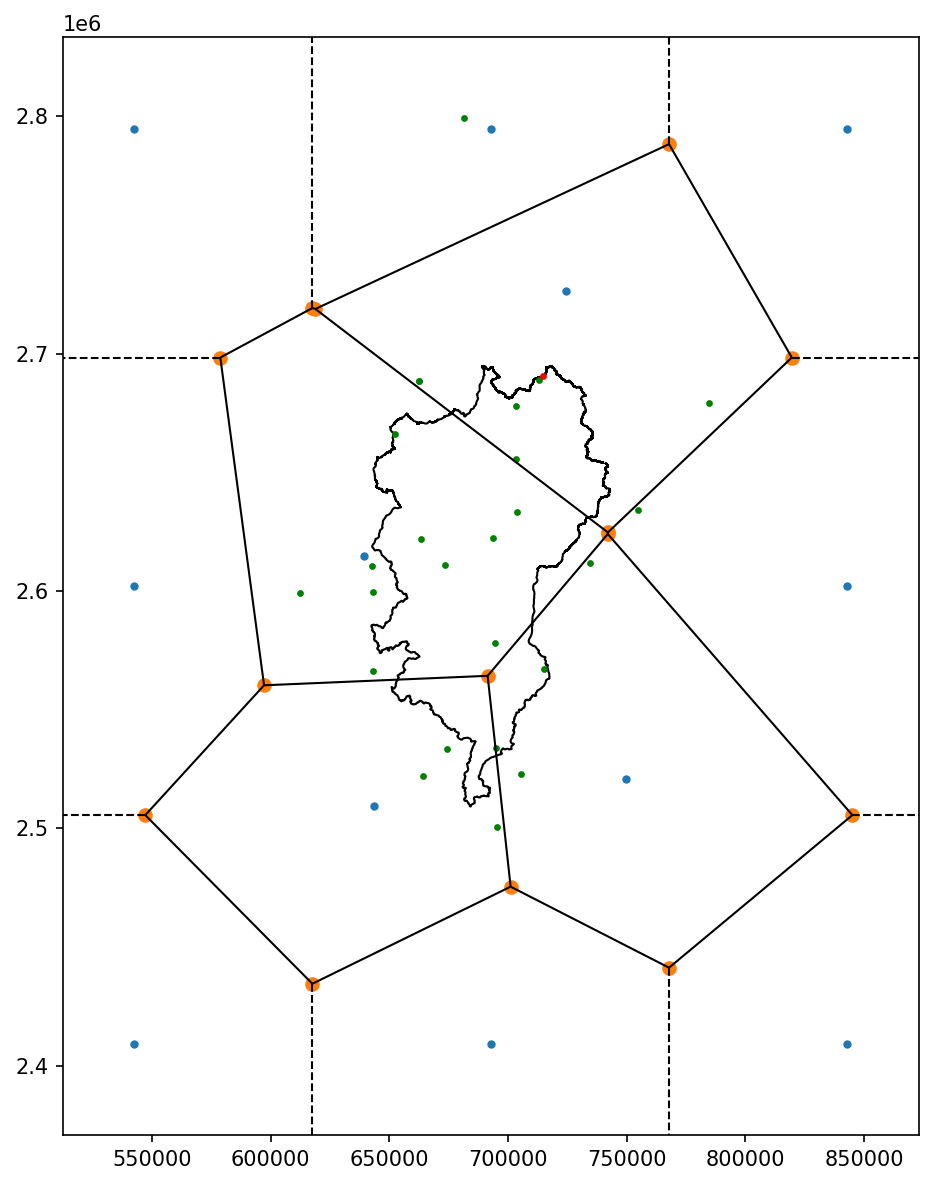

In [ ]:
# Polígonos de Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Creamos los polígonos de Thiessen.
#Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Graficamos las subcuencas.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k", zorder = 0)
# Graficamos la estación hidrométrica.
gdf_hidro.plot(ax = ax, color = "r", markersize = 5, zorder = 3)
# Graficamos las estaciones pluviométricas.
df_clic.plot(ax = ax, color = "g", markersize = 5, zorder = 2)
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax, zorder = 1)

fig.tight_layout()
plt.show()

In [ ]:
# Cargamos las estaciones pluviométricas relevantes.

# Creamos el nombre del archivo.
df_clic["Archivo"] = ( df_clic.index.astype(str)
    + "-" + df_clic["ESTACION"] + ".csv" )

# Cargamos la primera estación.
i = 0
precipitacion = pd.read_csv(dir_clic
    + df_clic.loc[df_clic.index[i], "Archivo"],
    skiprows = 7, index_col = "Fecha" )
# Rename cambia el nombre de una columna o fila.
precipitacion = precipitacion.rename(
    {"Valor": df_clic.loc[df_clic.index[i], "ESTACION"]}, axis = 1 )

# Cargamos las siguientes estaciones y las concatenamos.
for i in range(1, df_clic.shape[0]):
    est = pd.read_csv(dir_clic + df_clic.loc[df_clic.index[i], "Archivo"],
        skiprows = 7, index_col = "Fecha" )
    est = est.rename( {"Valor": df_clic.loc[df_clic.index[i], "ESTACION"]}
        , axis = 1 )
    # Concat une dos tablas a lo largo de un eje.
    precipitacion = pd.concat( [precipitacion, est ], axis = 1)

# Damos formato al índece.
precipitacion.index = pd.to_datetime( precipitacion.index )
precipitacion = precipitacion.sort_index()

precipitacion.head()

SAN FRANCISCO (SMN)  SAN GIL  NIEVES  RIO GRANDE (SMN)  \
Fecha                                                                
1921-01-01                  NaN      NaN     NaN               NaN   
1921-01-02                  NaN      NaN     NaN               NaN   
1921-01-03                  NaN      NaN     NaN               NaN   
1921-01-04                  NaN      NaN     NaN               NaN   
1921-01-05                  NaN      NaN     NaN               NaN   

            EL CAZADERO  SAIN ALTO  CAÑITAS DE FELIPE PESCADOR  EL SAUZ  \
Fecha                                                                     
1921-01-01          NaN        NaN                         NaN      NaN   
1921-01-02          NaN        NaN                         NaN      NaN   
1921-01-03          NaN        NaN                         NaN      NaN   
1921-01-04          NaN        NaN                         NaN      NaN   
1921-01-05          NaN        NaN                         NaN      NaN   

            FRESNILLO  JUAN ALDAMA  ...  BOCA DEL TESORERO  \
Fecha                               ...                      
1921-01-01        NaN          NaN  ...                NaN   
1921-01-02        NaN          NaN  ...                NaN   
1921-01-03        NaN          NaN  ...                NaN   
1921-01-04        NaN          NaN  ...                NaN   
1921-01-05        NaN          NaN  ...                NaN   

            SAN ISIDRO DE LOS GONZALEZ  SAN JOSE DE LOS LLANETES  \
Fecha                                                              
1921-01-01                         NaN                       NaN   
1921-01-02                         NaN                       NaN   
1921-01-03                         NaN                       NaN   
1921-01-04                         NaN                       NaN   
1921-01-05                         NaN                       NaN   

            NUEVO MERCURIO  COLONIA GREVER LA COLORADA  CORRALES  \
Fecha                                                              
1921-01-01             NaN                         NaN       NaN   
1921-01-02             NaN                         NaN       NaN   
1921-01-03             NaN                         NaN       NaN   
1921-01-04             NaN                         NaN       NaN   
1921-01-05             NaN                         NaN       NaN   

            SOMBRERETE (DGE)  PRESA SUSTICACAN  CHALCHIHUITES (SMN)  \
Fecha                                                                 
1921-01-01               0.0               NaN                  NaN   
1921-01-02               0.0               NaN                  NaN   
1921-01-03               0.0               NaN                  NaN   
1921-01-04               0.0               NaN                  NaN   
1921-01-05               0.0               NaN                  NaN   

            TEJABAN DE LA ROSITA  
Fecha                             
1921-01-01                   NaN  
1921-01-02                   NaN  
1921-01-03                   NaN  
1921-01-04                   NaN  
1921-01-05                   NaN  

[5 rows x 25 columns]

In [ ]:
# Escogemos la fecha de la tormenta.
years  = [2013]
months = [9]
days   = range(14, 22)
tormenta = precipitacion[ precipitacion.index.year.isin(years)
    & precipitacion.index.month.isin(months)
    & precipitacion.index.day.isin(  days  )
    ].dropna(axis = 1)

# Revisamos las estaciones que no tienen datos en esas fecha.
# Hay que regresar y quitar las estaciones pluviométricas sin datos.
precipitacion.columns[ ~precipitacion.columns.isin(tormenta.columns) ]

Index([], dtype='object')

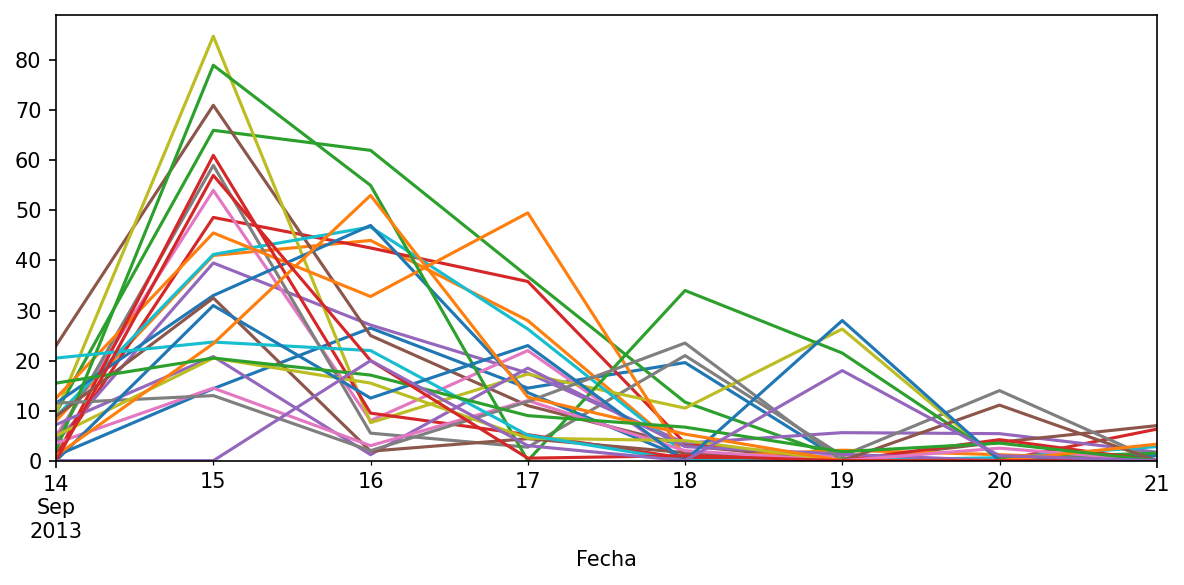

In [ ]:
# Hietograma de la tormenta.
# Se grafican como líneas para permitir visualizar
# la precipitación de todas las estaciones.

# Inicializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Graficamos la precipitación.
tormenta.plot(ax = ax, legend = False)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( tormenta.index.min(), tormenta.index.max() )
              
fig.tight_layout()
plt.show()

In [ ]:
# Precipitación en cada estación.
df_clic_t = df_clic.join(tormenta.T, "ESTACION")
df_clic_t.columns = df_clic_t.columns.astype(str)
# Precipitación total de la estación.
df_clic["Precipitacion"] = df_clic_t.iloc[:, 11:].sum(axis = 1)
# Precipitación diaria en cada estación.
df_clic_t.head()

ESTACION     ESTADO  LONGITUD  LATITUD  ELEVACION  INICIO  \
CLAVE                                                                         
32049  SAN FRANCISCO (SMN)  ZACATECAS    -102.9     24.3       1680  May-44   
32050              SAN GIL  ZACATECAS    -103.0     24.2       1829  Jul-69   
32038               NIEVES  ZACATECAS    -103.0     24.0       1913  Jan-42   
32045     RIO GRANDE (SMN)  ZACATECAS    -103.0     23.8       1902  Jun-22   
32006          EL CAZADERO  ZACATECAS    -103.1     23.7       1862  Aug-63   

          FIN                        geometry              x             y  \
CLAVE                                                                        
32049  Dec-14  POINT (713126.967 2689049.124)  713126.967234  2.689049e+06   
32050  Dec-14  POINT (703134.114 2677823.333)  703134.113575  2.677823e+06   
32038  Dec-14  POINT (703449.987 2655671.205)  703449.987170  2.655671e+06   
32045  Dec-14  POINT (703763.387 2633519.583)  703763.386772  2.633520e+06   
32006  Dec-14  POINT (693720.585 2622304.392)  693720.585167  2.622304e+06   

                             Archivo  2013-09-14 00:00:00  \
CLAVE                                                       
32049  32049-SAN FRANCISCO (SMN).csv                  1.0   
32050              32050-SAN GIL.csv                  8.0   
32038               32038-NIEVES.csv                  9.6   
32045     32045-RIO GRANDE (SMN).csv                  1.2   
32006          32006-EL CAZADERO.csv                  3.7   

       2013-09-15 00:00:00  2013-09-16 00:00:00  2013-09-17 00:00:00  \
CLAVE                                                                  
32049                 14.4                 26.5                 14.5   
32050                 41.0                 44.0                 28.0   
32038                 66.0                 62.0                 36.8   
32045                 48.6                 42.5                 35.8   
32006                 39.5                 27.1                 17.5   

       2013-09-18 00:00:00  2013-09-19 00:00:00  2013-09-20 00:00:00  \
CLAVE                                                                  
32049                 19.6                  0.0                  0.0   
32050                  1.5                  0.0                  0.0   
32038                 11.7                  0.5                  0.0   
32045                  3.5                  0.0                  0.0   
32006                  3.5                  5.6                  5.4   

       2013-09-21 00:00:00  
CLAVE                       
32049                  0.0  
32050                  0.0  
32038                  0.0  
32045                  6.3  
32006                  1.7

In [ ]:
# Precipitación promedio en cada día según estaciones pluviométricas.
tormenta.mean(axis = 1)

Fecha
2013-09-14     6.952
2013-09-15    39.796
2013-09-16    24.296
2013-09-17    15.388
2013-09-18     6.332
2013-09-19     4.284
2013-09-20     1.908
2013-09-21     0.944
dtype: float64

In [ ]:
# Representamos gráficamente la precipitación diaria en cada estación.

# Graficamos las subcuencas.
map = gdf_subc.explore()
# Graficamos las estaciones.
df_clic_t.explore("2013-09-15 00:00:00", m = map)

In [ ]:
# Cargamos la información de la ESMA Sombrerete.
# Al analizar el Excel, vemos que Sombrerete reporta
# la precipitación cada hora, ya que es una ESMA
# (sinóptica sincronizada a la red de la OMM) y no una EMA.

# Fecha de la tormenta.
years  = [2013]
months = [9]
days   = range(15, 19)

# Cargamos el archivo.
pre_somb = pd.read_csv( path + est_somb_n, index_col = "DateTime",
    usecols = ["DateTime", "Rain"])
pre_somb.index = pd.to_datetime(pre_somb.index)

# La información de precipitación se reporta 10 minutos antes de la hora.
pre_somb = pre_somb[ pre_somb.index.minute.isin([50]) ]

# Ajustamos para reportar la información al inicio de la hora
# y que sea compatible con el resto de las EMAS.
pre_somb.index = pre_somb.index.shift(-1, "50Min")

# Corrección de UTC a hora local.
pre_somb.index = pre_somb.index.shift(-6, "H")

# Escogemos la tormenta.
pre_somb = pre_somb[ pre_somb.index.year.isin(years)
    & pre_somb.index.month.isin(months)
    & pre_somb.index.day.isin(  days  ) ]

pre_somb.head()

Rain
DateTime                 
2013-09-15 00:00:00  0.51
2013-09-15 01:00:00     0
2013-09-15 02:00:00  0.25
2013-09-15 03:00:00     0
2013-09-15 04:00:00     0

In [ ]:
# Cargamos la información de las otras EMAs, que
# previamente se han juntado a mano en otro archivo.

# Cargamos el archivo.
pre_emas = pd.read_csv(path + est_emasp_n, index_col = "fecha")
pre_emas.index = pd.to_datetime(pre_emas.index)

# Corrección de UTC a hora local.
pre_emas.index = pre_emas.index.shift(-6, "H")

# Escogemos la tormenta.
pre_emas = pre_emas[ pre_emas.index.year.isin(years)
    & pre_emas.index.month.isin(months)
    & pre_emas.index.day.isin(  days  ) ]

# La información se reporta cada 10 minutos, para hacerla
# compatible con Sombrerete debemos ajustarla a cada hora.
pre_emas = pre_emas.resample("H").sum()

# Agregamos la información de Sombrerete.
pre_emas["SOMBRERETE"] = pre_somb["Rain"].astype(float)

# Escogemos el inicio y fin de la tormenta
# (a partir de la visualización gráfica).
pre_emas = pre_emas.iloc[15:-19]

pre_emas

ZACATECAS  SANJUANDEGUADALUPE  LAFLORIDASMN  SOMBRERETE
fecha                                                                       
2013-09-15 15:00:00       0.00                 0.0           0.0        0.00
2013-09-15 16:00:00       0.00                 0.0           0.0        0.25
2013-09-15 17:00:00       0.00                 0.0           0.0        0.76
2013-09-15 18:00:00       0.00                 1.6           0.0        0.51
2013-09-15 19:00:00       0.00                 2.6           0.0        1.78
...                        ...                 ...           ...         ...
2013-09-18 00:00:00       8.12                 0.2           0.0        0.00
2013-09-18 01:00:00       5.60                 0.0           0.0        0.00
2013-09-18 02:00:00       3.56                 0.0           0.0        0.00
2013-09-18 03:00:00       1.51                 0.0           0.0        0.00
2013-09-18 04:00:00       0.00                 0.0           0.0        0.00

[62 rows x 4 columns]

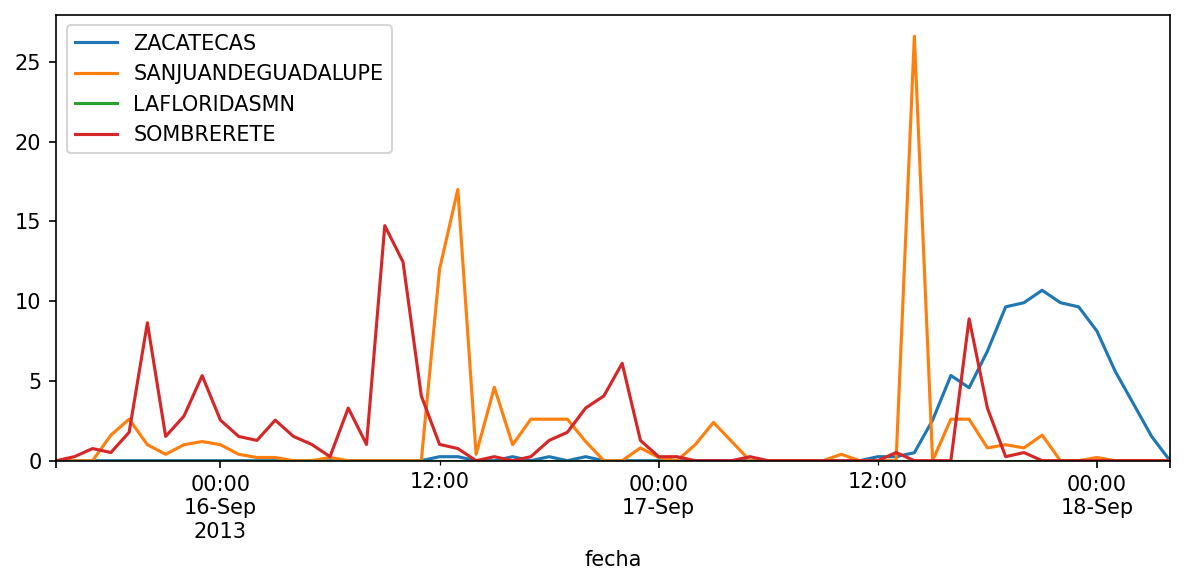

In [ ]:
# Hietograma de las EMAs.

# Inicializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Graficamos la precipitación de todas las estaciones.
pre_emas.plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( pre_emas.index.min(), pre_emas.index.max() )
              
fig.tight_layout()
plt.show()

In [ ]:
# Precipitación diaria para cada EMA.
# Al comparar estos valores con las estaciones pluviométricas, y con
# el hidrograma de la tormenta, resulta evidente que el horario de las
# EMAS está en el tiempo de Greenwich (UTC) y que hay que restarle 6 horas
# para llegar a la hora local de México (UTC-6)

pre_emas.groupby(pre_emas.index.day).sum()#.sum(axis = 1)

ZACATECAS  SANJUANDEGUADALUPE  LAFLORIDASMN  SOMBRERETE
fecha                                                         
15          0.00                 7.8           0.0       21.58
16          1.25                46.8           0.0       66.28
17         70.07                41.2           0.0       14.21
18         18.79                 0.2           0.0        0.00

In [ ]:
# Agregamos la precipitación total de las EMAs.

pre_tot = pre_emas.sum()
pre_tot.name = "Precipitacion"
df_emas = df_emas.join(pre_tot, "ESTACION")

df_emas

ESTACION    LATITUD    LONGITUD     ESTADO  ALTITUD  \
0  SANJUANDEGUADALUPE  24.637500 -102.782778    DURANGO   1526.0   
1          SOMBRERETE  23.638880 -103.636380  ZACATECAS   2353.0   
2        LAFLORIDASMN  22.686111 -103.602500  ZACATECAS   1870.0   
3           ZACATECAS  22.778330 -102.566380  ZACATECAS   2576.0   

               MUNICIPIO ORGANISMO                        geometry  \
0  SAN JUAN DE GUADALUPE       SMN  POINT (724428.028 2726620.477)   
1             SOMBRERETE  SMN-ESMA  POINT (639088.498 2614910.210)   
2             VALPARAISO       SMN  POINT (643557.011 2509448.364)   
3              ZACATECAS  SMN-ESMA  POINT (749859.450 2521036.589)   

               x             y  \
0  724428.028320  2.726620e+06   
1  639088.498493  2.614910e+06   
2  643557.011191  2.509448e+06   
3  749859.450268  2.521037e+06   

                                            Thiessen  Precipitacion  
0  POLYGON ((767794.186 2788322.614, 618778.099 2...          96.00  
1  POLYGON ((691360.442 2564299.429, 597158.320 2...         102.07  
2  POLYGON ((691360.442 2564299.429, 597158.320 2...           0.00  
3  POLYGON ((691360.442 2564299.429, 701044.591 2...          90.11

In [ ]:
# Isoyetas

# Calculamos las isoyetas y las guardamos en una variable.
isoyetas = plt.tricontour( df_clic["x"],
    df_clic["y"], df_clic["Precipitacion"], levels = 10 )

# Extraemos las isoyetas y las convertimos en curvas de Shapely.

# Lista con el nivel de las isoyetas repetido
# por cada isoyeta que haya en ese nivel.
hp_level = []
# Cantidad de isoyetas que tiene un nivel.
level_n  = []
# Curvas de cada isoyeta.
level_c  = []

# Iteramos para todos los grupos de isoyetas allsegs.
# Evitamos el primer y último grupo que están vacíos.
for i in range( len(isoyetas.allsegs[1:-1]) ):
    # Contamos la cantidad de isoyetas que hay en un grupo, lo agregamos
    # a la lista level_n e imprimimos los valores.
    level_n.append( len( isoyetas.allsegs[1 + i] ) )

    # Copiamos el nivel de la isoyeta tantas
    # veces como isoyetas haya en ese nivel.
    hp_level = hp_level + [isoyetas.levels[i]] * level_n[i]

    # Entramos en cada grupo i, que tiene una cantidad level_n[i]
    # de elementos dentro, convertimos cada elemento en una
    # geometría de shapely y lo metemos dentro de una lista
    # de una sola dimensión (como hacer flatten).
    for j in range( 0, level_n[i] ):
        level_c.append( shp.geometry.LineString(isoyetas.allsegs[i + 1][j]) )

# Creamos un DataFrame con los niveles de isoyetas.
df_is = pd.DataFrame(hp_level, columns = ["Precipitacion"])
# Agregamos las geometrías de shapely.
df_is["geometry"] = level_c
# Convertimos en un GeoDataFrame.
df_is = gpd.GeoDataFrame(df_is)
# Establecemos que hemos estado trabajando con coordenadas UTM 11N (m).
df_is = df_is.set_crs(CRS)

# Evitamos graficar.
plt.close()

In [ ]:
# Graficamos las isoyetas.

# Graficamos las subcuencas.
map = gdf_subc.explore()
# Isoyetas
df_is.explore("Precipitacion", m = map)

In [ ]:
# Áreas de influencia

# Escogemos la parte de cada polígono de Thiessen que cae dentro de la cuenca.
df_emas[gdf_subc.loc[0, "CVE_SUBCUE"]] = ( df_emas[ "Thiessen"
    ].intersection( gdf_subc.loc[0, "geometry"] ) )
df_emas = df_emas.set_geometry(gdf_subc.loc[0, "CVE_SUBCUE"]).copy()

# Eliminamos las estaciones que no son relevantes para la cuenca.
subc_th = df_emas[ ~ df_emas.is_empty ].reset_index(drop = True)
# Área de las áreas de influencia.
subc_th[f"{gdf_subc.loc[0, 'CVE_SUBCUE']}_AREA"] = subc_th.area

subc_th

ESTACION    LATITUD    LONGITUD     ESTADO  ALTITUD  \
0  SANJUANDEGUADALUPE  24.637500 -102.782778    DURANGO   1526.0   
1          SOMBRERETE  23.638880 -103.636380  ZACATECAS   2353.0   
2        LAFLORIDASMN  22.686111 -103.602500  ZACATECAS   1870.0   
3           ZACATECAS  22.778330 -102.566380  ZACATECAS   2576.0   

               MUNICIPIO ORGANISMO                        geometry  \
0  SAN JUAN DE GUADALUPE       SMN  POINT (724428.028 2726620.477)   
1             SOMBRERETE  SMN-ESMA  POINT (639088.498 2614910.210)   
2             VALPARAISO       SMN  POINT (643557.011 2509448.364)   
3              ZACATECAS  SMN-ESMA  POINT (749859.450 2521036.589)   

               x             y  \
0  724428.028320  2.726620e+06   
1  639088.498493  2.614910e+06   
2  643557.011191  2.509448e+06   
3  749859.450268  2.521037e+06   

                                            Thiessen  Precipitacion  \
0  POLYGON ((767794.186 2788322.614, 618778.099 2...          96.00   
1  POLYGON ((691360.442 2564299.429, 597158.320 2...         102.07   
2  POLYGON ((691360.442 2564299.429, 597158.320 2...           0.00   
3  POLYGON ((691360.442 2564299.429, 701044.591 2...          90.11   

                                              RH36Dc   RH36Dc_AREA  
0  GEOMETRYCOLLECTION (POLYGON ((676414.579 26748...  1.989105e+09  
1  GEOMETRYCOLLECTION (POLYGON ((653533.148 25626...  6.573524e+09  
2  POLYGON ((691360.442 2564299.429, 695028.308 2...  9.351046e+08  
3  POLYGON ((691360.442 2564299.429, 710230.744 2...  6.932455e+08

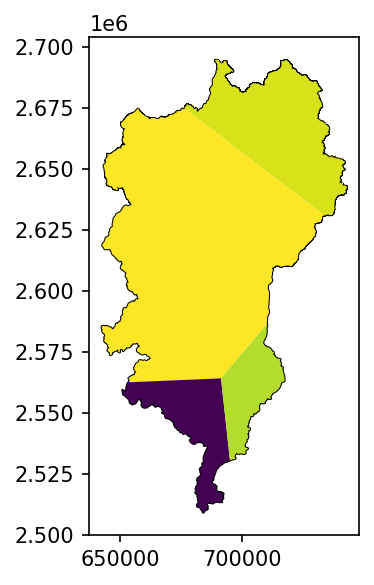

In [ ]:
# Áreas de influencia

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Graficamos la cuenca.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las áreas de influencia.
df_emas.plot("Precipitacion", ax = ax)

fig.tight_layout()
plt.show()

In [ ]:
# Obtenemos la parte de la línea de cada isoyeta que cae dentro de la cuenca.
df_is[gdf_subc.loc[0, "CVE_SUBCUE"]] = df_is["geometry"
    ].intersection( gdf_subc.loc[0, "geometry"] )
#subc_is[f"{Subcuenca.loc[0, 'CVE_SUBCUE']}_POLY"] = ( subc_is.set_geometry(
#    "IS_TOT").intersection( Subcuenca.loc[0, "geometry"] ) )
subc_is = df_is.set_geometry(gdf_subc.loc[0, "CVE_SUBCUE"]).copy()

# Eliminamos las isoyetas que no cruzan la subcuenca.
subc_is = subc_is[ ~ subc_is.is_empty ].reset_index(drop = True)

subc_is

Precipitacion                                           geometry  \
0            45.0  LINESTRING (635738.247 2564542.763, 655954.636...   
1            45.0  LINESTRING (704808.960 2523277.741, 695039.829...   
2            60.0  LINESTRING (616746.372 2592725.378, 650440.354...   
3            75.0  LINESTRING (670685.019 2737352.955, 667708.743...   
4            90.0  LINESTRING (667395.022 2717968.339, 663488.660...   
5           105.0  LINESTRING (664105.026 2698583.722, 659268.577...   
6           105.0  LINESTRING (699672.760 2575196.163, 707988.979...   
7           120.0  LINESTRING (705982.392 2633554.767, 726396.550...   
8           120.0  LINESTRING (706010.774 2571878.681, 710871.500...   
9           135.0  LINESTRING (712348.788 2568561.199, 713754.022...   
10          135.0  LINESTRING (719726.037 2648896.043, 706652.315...   
11          150.0  LINESTRING (713055.525 2651672.749, 705339.886...   
12          165.0  LINESTRING (706385.013 2654449.454, 704027.456...   

                                               RH36Dc  
0   LINESTRING (681753.188 2512741.345, 682224.326...  
1   MULTILINESTRING ((689018.004 2525750.371, 6837...  
2   MULTILINESTRING ((671701.138 2546543.652, 6801...  
3   MULTILINESTRING ((655064.892 2595881.159, 6603...  
4   MULTILINESTRING ((642747.081 2619043.579, 6441...  
5   MULTILINESTRING ((647360.616 2629769.348, 6473...  
6   MULTILINESTRING ((699672.760 2575196.163, 7079...  
7   MULTILINESTRING ((705982.392 2633554.767, 7263...  
8   MULTILINESTRING ((706010.774 2571878.681, 7108...  
9   MULTILINESTRING ((712348.788 2568561.199, 7137...  
10  MULTILINESTRING ((719726.037 2648896.043, 7066...  
11  LINESTRING (713055.525 2651672.749, 705339.886...  
12  LINESTRING (706385.013 2654449.454, 704027.456...

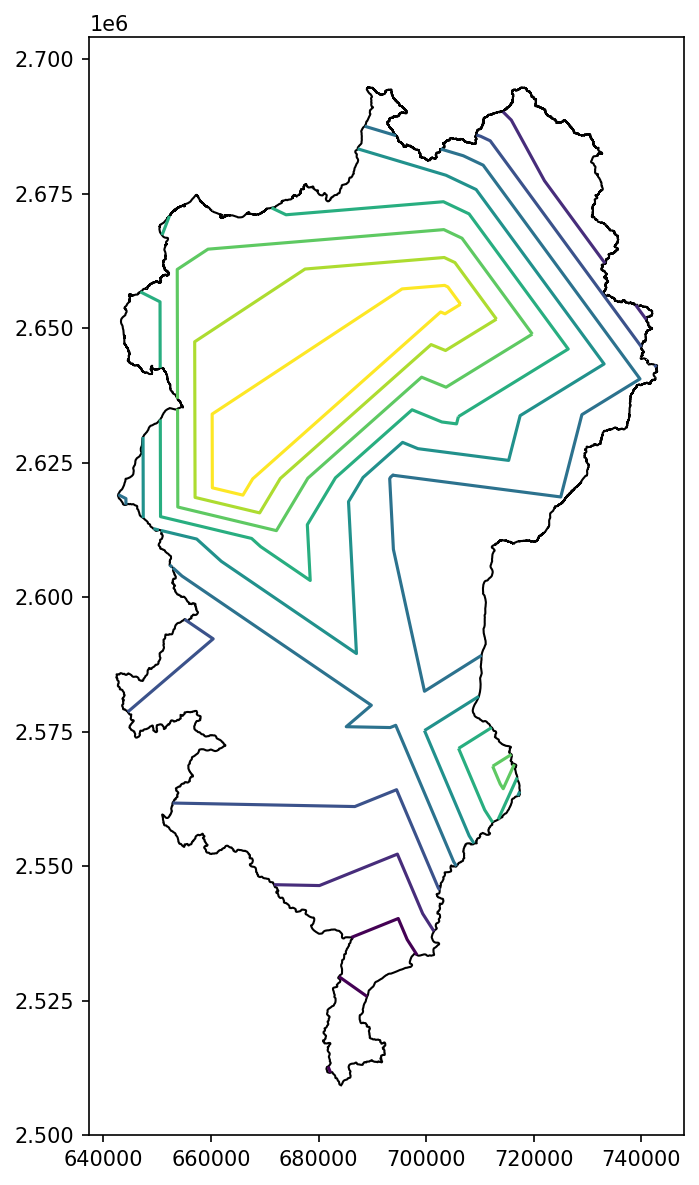

In [ ]:
# Isoyetas que cruzan la cuenca.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Graficamos la subcuenca.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las isoyetas.
subc_is.plot("Precipitacion", ax = ax)

fig.tight_layout()
plt.show()

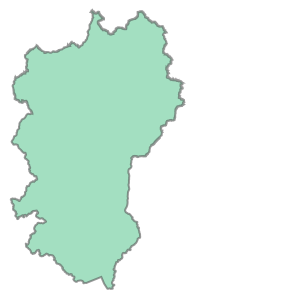

In [ ]:
# Verificamos la geometría que hay que utilizar dentro del split
# para el área incremental isoyetas.
i = 1
j = 0

shp.ops.split(gdf_subc.loc[0, "geometry"], subc_is.loc[i, "geometry"]).geoms[j]

# Como la geometría fue generada por el método de upslope area en QGIS,
# hay errores minúsculos en la geometría. por eso las listas tienen
# más de 40 elementos que son simplemente líneas. Hay formas de limpiar
# la geometría en QGIS antes de cargarla aquí.

In [ ]:
# Área incremental de isoyetas.

# Geometrías a utilizar dentro del split para el área incremental de isoyetas.
j = [ [0], [0, 2], [0], [0], [1], [1], [37], [1], [37], [37], [1], [37], [37] ]
m = []

# Iteramos para todas las isoyetas.
for i in range(subc_is.shape[0]):

    g = []
    # Curva de la isoyeta.
    l = subc_is.loc[i, "geometry"]

    # Unimos todas las geometrías del área incremental isoyetas.
    for k in j[i]:
        g.append( shp.ops.split( gdf_subc.loc[0, "geometry"], l).geoms[k] )

    # Agregamos la geometría.
    m.append( shp.geometry.MultiPolygon(g) )

# Agregamoslas geometrías creadas.
subc_is[f"{gdf_subc.loc[0, 'CVE_SUBCUE']}_POLY"] = m

subc_is

Precipitacion                                           geometry  \
0            45.0  LINESTRING (635738.247 2564542.763, 655954.636...   
1            45.0  LINESTRING (704808.960 2523277.741, 695039.829...   
2            60.0  LINESTRING (616746.372 2592725.378, 650440.354...   
3            75.0  LINESTRING (670685.019 2737352.955, 667708.743...   
4            90.0  LINESTRING (667395.022 2717968.339, 663488.660...   
5           105.0  LINESTRING (664105.026 2698583.722, 659268.577...   
6           105.0  LINESTRING (699672.760 2575196.163, 707988.979...   
7           120.0  LINESTRING (705982.392 2633554.767, 726396.550...   
8           120.0  LINESTRING (706010.774 2571878.681, 710871.500...   
9           135.0  LINESTRING (712348.788 2568561.199, 713754.022...   
10          135.0  LINESTRING (719726.037 2648896.043, 706652.315...   
11          150.0  LINESTRING (713055.525 2651672.749, 705339.886...   
12          165.0  LINESTRING (706385.013 2654449.454, 704027.456...   

                                               RH36Dc  \
0   LINESTRING (681753.188 2512741.345, 682224.326...   
1   MULTILINESTRING ((689018.004 2525750.371, 6837...   
2   MULTILINESTRING ((671701.138 2546543.652, 6801...   
3   MULTILINESTRING ((655064.892 2595881.159, 6603...   
4   MULTILINESTRING ((642747.081 2619043.579, 6441...   
5   MULTILINESTRING ((647360.616 2629769.348, 6473...   
6   MULTILINESTRING ((699672.760 2575196.163, 7079...   
7   MULTILINESTRING ((705982.392 2633554.767, 7263...   
8   MULTILINESTRING ((706010.774 2571878.681, 7108...   
9   MULTILINESTRING ((712348.788 2568561.199, 7137...   
10  MULTILINESTRING ((719726.037 2648896.043, 7066...   
11  LINESTRING (713055.525 2651672.749, 705339.886...   
12  LINESTRING (706385.013 2654449.454, 704027.456...   

                                          RH36Dc_POLY  
0   (POLYGON ((702713.503607406 2546724.143857754,...  
1   (POLYGON ((702713.503607406 2546724.143857754,...  
2   (POLYGON ((702713.503607406 2546724.143857754,...  
3   (POLYGON ((702713.503607406 2546724.143857754,...  
4   (POLYGON ((652901.3053898442 2605457.99633026,...  
5   (POLYGON ((650672.6970506446 2612393.103837228...  
6   (POLYGON ((709796.5117643978 2581562.891822825...  
7   (POLYGON ((650566.8572712668 2633025.035723852...  
8   (POLYGON ((712181.4576368303 2575759.363703294...  
9   (POLYGON ((715845.9456802541 2570760.527146079...  
10  (POLYGON ((653776.1028482458 2635004.121869169...  
11  (POLYGON ((713055.5249532731 2651672.748795281...  
12  (POLYGON ((706385.0126036147 2654449.454253187...

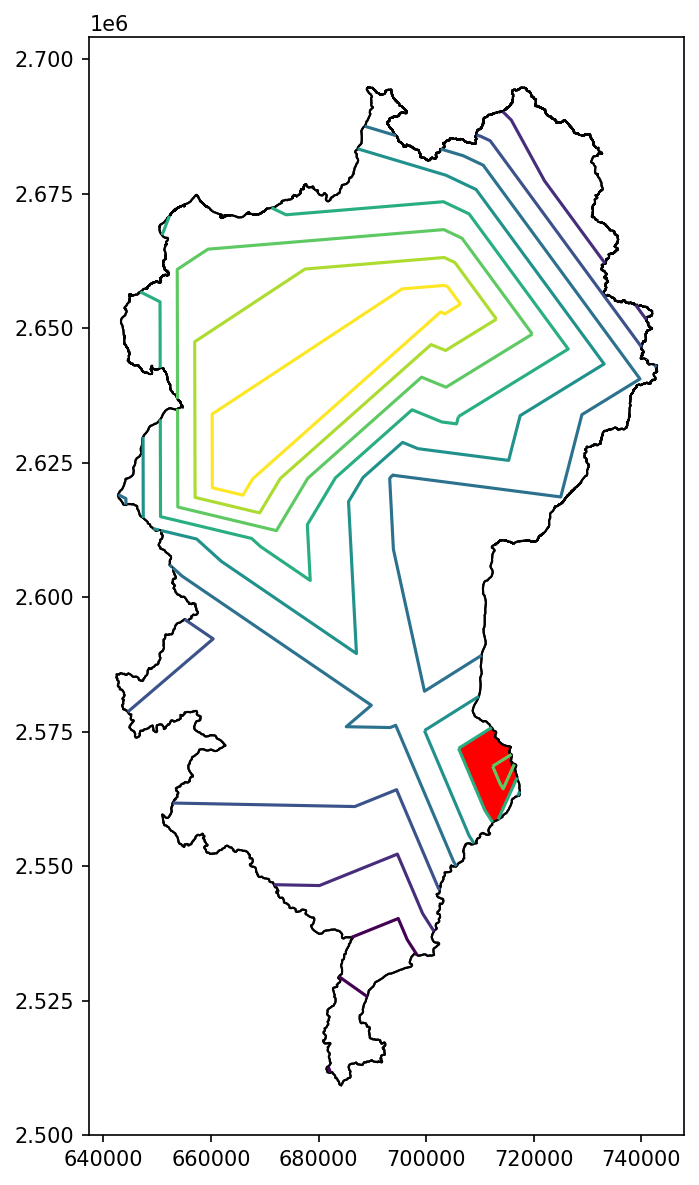

In [ ]:
# Áreas de influencia + áreas incremental de isoyetas (Ci para h - a - d)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

i = 8

# Graficamos la subcuenca.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k")
# Áreas de influencia.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las isoyetas.
subc_is.set_geometry(gdf_subc.loc[0, 'CVE_SUBCUE']
    ).plot("Precipitacion", ax = ax)
# Áreas de isoyetas incrementales.
subc_is.set_geometry(f"{gdf_subc.loc[0, 'CVE_SUBCUE']}_POLY"
    ).loc[ [i] ].plot( ax = ax, color = "r", zorder = 0)

fig.tight_layout()
plt.show()

In [ ]:
# Como la forma de las isoyetas es compleja, no va a ser posible utilizar
# de manera automática el método visto en clase.
# Primero corregimos el orden de las áreas incrementales, para que
# las áreas de cada máximo local de las isoyetas queden juntas.
# El orden a utilizar se obtiene de la visualización gráfica.

subc_is["orden"] = [0, 1, 2, 3, 4, 8, 5, 9, 6, 7, 10, 11, 12]
subc_is = subc_is.sort_values("orden").drop(
    "orden", axis = 1).reset_index(drop = True)
subc_is

Precipitacion                                           geometry  \
0            45.0  LINESTRING (635738.247 2564542.763, 655954.636...   
1            45.0  LINESTRING (704808.960 2523277.741, 695039.829...   
2            60.0  LINESTRING (616746.372 2592725.378, 650440.354...   
3            75.0  LINESTRING (670685.019 2737352.955, 667708.743...   
4            90.0  LINESTRING (667395.022 2717968.339, 663488.660...   
5           105.0  LINESTRING (699672.760 2575196.163, 707988.979...   
6           120.0  LINESTRING (706010.774 2571878.681, 710871.500...   
7           135.0  LINESTRING (712348.788 2568561.199, 713754.022...   
8           105.0  LINESTRING (664105.026 2698583.722, 659268.577...   
9           120.0  LINESTRING (705982.392 2633554.767, 726396.550...   
10          135.0  LINESTRING (719726.037 2648896.043, 706652.315...   
11          150.0  LINESTRING (713055.525 2651672.749, 705339.886...   
12          165.0  LINESTRING (706385.013 2654449.454, 704027.456...   

                                               RH36Dc  \
0   LINESTRING (681753.188 2512741.345, 682224.326...   
1   MULTILINESTRING ((689018.004 2525750.371, 6837...   
2   MULTILINESTRING ((671701.138 2546543.652, 6801...   
3   MULTILINESTRING ((655064.892 2595881.159, 6603...   
4   MULTILINESTRING ((642747.081 2619043.579, 6441...   
5   MULTILINESTRING ((699672.760 2575196.163, 7079...   
6   MULTILINESTRING ((706010.774 2571878.681, 7108...   
7   MULTILINESTRING ((712348.788 2568561.199, 7137...   
8   MULTILINESTRING ((647360.616 2629769.348, 6473...   
9   MULTILINESTRING ((705982.392 2633554.767, 7263...   
10  MULTILINESTRING ((719726.037 2648896.043, 7066...   
11  LINESTRING (713055.525 2651672.749, 705339.886...   
12  LINESTRING (706385.013 2654449.454, 704027.456...   

                                          RH36Dc_POLY  
0   (POLYGON ((702713.503607406 2546724.143857754,...  
1   (POLYGON ((702713.503607406 2546724.143857754,...  
2   (POLYGON ((702713.503607406 2546724.143857754,...  
3   (POLYGON ((702713.503607406 2546724.143857754,...  
4   (POLYGON ((652901.3053898442 2605457.99633026,...  
5   (POLYGON ((709796.5117643978 2581562.891822825...  
6   (POLYGON ((712181.4576368303 2575759.363703294...  
7   (POLYGON ((715845.9456802541 2570760.527146079...  
8   (POLYGON ((650672.6970506446 2612393.103837228...  
9   (POLYGON ((650566.8572712668 2633025.035723852...  
10  (POLYGON ((653776.1028482458 2635004.121869169...  
11  (POLYGON ((713055.5249532731 2651672.748795281...  
12  (POLYGON ((706385.0126036147 2654449.454253187...

In [ ]:
# Áreas de influencia para cada Ci, área incremental de isoyetas.

for i in subc_is.index:
    # La geometría es la intersección del área incremental de isoyeta Ci y los
    # polígonos de Thiessen dentro de la cuenca.
    subc_th[f"IS_{subc_is.index[i]}"] = subc_th[
        gdf_subc.loc[0, 'CVE_SUBCUE'] ].intersection(
        subc_is.loc[ i, f"{gdf_subc.loc[0, 'CVE_SUBCUE']}_POLY" ] )
    # Calculamos el área.
    subc_th[f"IS_{subc_is.index[i]}_AREA"] = subc_th[
        f"IS_{subc_is.index[i]}"].area

subc_th

ESTACION    LATITUD    LONGITUD     ESTADO  ALTITUD  \
0  SANJUANDEGUADALUPE  24.637500 -102.782778    DURANGO   1526.0   
1          SOMBRERETE  23.638880 -103.636380  ZACATECAS   2353.0   
2        LAFLORIDASMN  22.686111 -103.602500  ZACATECAS   1870.0   
3           ZACATECAS  22.778330 -102.566380  ZACATECAS   2576.0   

               MUNICIPIO ORGANISMO                        geometry  \
0  SAN JUAN DE GUADALUPE       SMN  POINT (724428.028 2726620.477)   
1             SOMBRERETE  SMN-ESMA  POINT (639088.498 2614910.210)   
2             VALPARAISO       SMN  POINT (643557.011 2509448.364)   
3              ZACATECAS  SMN-ESMA  POINT (749859.450 2521036.589)   

               x             y  ...  \
0  724428.028320  2.726620e+06  ...   
1  639088.498493  2.614910e+06  ...   
2  643557.011191  2.509448e+06  ...   
3  749859.450268  2.521037e+06  ...   

                                                IS_8     IS_8_AREA  \
0  GEOMETRYCOLLECTION (LINESTRING (676510.918 267...  9.366708e+08   
1  GEOMETRYCOLLECTION (LINESTRING (654748.952 263...  3.558127e+09   
2                                      POLYGON EMPTY  0.000000e+00   
3                                      POLYGON EMPTY  0.000000e+00   

                                                IS_9     IS_9_AREA  \
0  POLYGON ((719542.361 2641900.700, 680624.163 2...  5.538283e+08   
1  GEOMETRYCOLLECTION (LINESTRING (654748.952 263...  2.757287e+09   
2                                      POLYGON EMPTY  0.000000e+00   
3                                      POLYGON EMPTY  0.000000e+00   

                                               IS_10    IS_10_AREA  \
0  POLYGON ((714553.092 2645712.183, 686752.591 2...  2.905305e+08   
1  GEOMETRYCOLLECTION (LINESTRING (654748.952 263...  2.042651e+09   
2                                      POLYGON EMPTY  0.000000e+00   
3                                      POLYGON EMPTY  0.000000e+00   

                                               IS_11    IS_11_AREA  \
0  POLYGON ((709563.824 2649523.666, 692881.018 2...  1.112046e+08   
1  POLYGON ((692881.018 2662268.267, 709563.824 2...  1.338108e+09   
2                                      POLYGON EMPTY  0.000000e+00   
3                                      POLYGON EMPTY  0.000000e+00   

                                               IS_12    IS_12_AREA  
0  POLYGON ((704574.556 2653335.149, 699009.446 2...  1.585067e+07  
1  POLYGON ((699009.446 2657586.539, 704574.556 2...  5.615130e+08  
2                                      POLYGON EMPTY  0.000000e+00  
3                                      POLYGON EMPTY  0.000000e+00  

[4 rows x 40 columns]

In [ ]:
# Precipitación media por Thiessen.

# Creamos una lista con nombres de las isoyetas y sus áreas.
areas_n = ( [ gdf_subc.loc[0, "CVE_SUBCUE"] ]
    + [ f"IS_{x}"for x in subc_is.index ] )
areas_na = [f"{x}_AREA" for x in areas_n]

# Precipitación media por Thiessen.
hp_th = []
for i in range( len(areas_na) ):
    hp_th.append( ( subc_th["Precipitacion"] * subc_th[areas_na[i]] ).sum()
        / subc_th[areas_na[i]].sum() )

# Creamos un DataFrame con la precipitación media.
areas_is = pd.DataFrame( hp_th, columns = ["hp_th"],
    index = areas_n ).reset_index()
areas_is = areas_is.rename( {"index": "AREA"}, axis = 1)

areas_is

AREA       hp_th
0   RH36Dc   90.705909
1     IS_0   90.710290
2     IS_1   91.582735
3     IS_2   94.453281
4     IS_3   99.383198
5     IS_4  100.158963
6     IS_5   90.152612
7     IS_6   90.110000
8     IS_7   90.110000
9     IS_8  100.805073
10    IS_9  101.054711
11   IS_10  101.314156
12   IS_11  101.604254
13   IS_12  101.903357

In [ ]:
# Precipitación media por isoyetas.

# Áreas entre isoyetas.
# Diferencia entre el área de dos isoyetas contiguas.
# Los casos borde son ligeramente diferente (ejemplo: toda la subcuenca menos
# primer isoyeta).
m = []
for i in areas_is.index:
    if i == areas_is.index[-1]:
        p = subc_is.loc[i - 1, f"{areas_n[0]}_POLY"]
    elif i > 0:
        p = subc_is.loc[i - 1, f"{areas_n[0]}_POLY"
            ].difference( subc_is.loc[ i, f"{areas_n[0]}_POLY"] )
    
    # Debido a las imperfecciones de la geometría de QGIS, esta línea no
    # funciona automáticamente, por lo que se escoge de manera manual.
    # Se observó que esto no funcionaba a partir de la inspección visual
    # de las áreas entre isoyetas.
    else:
        #p = gdf_subc.loc[0, "geometry"].difference(
        #    subc_is.loc[i, f"{areas_n[0]}_POLY"] )
        p = shp.ops.split(gdf_subc.loc[0, "geometry"],
            subc_is.loc[0, "geometry"]).geoms[1]

    # En la isoyeta donde se parten los dos máximos locales, hay que restar
    # uno de los dos máximos de manera manual.
    if i == 5:  
        p = p.difference( subc_is.loc[ 8, f"{areas_n[0]}_POLY"] )
    
    if type(p) == shp.geometry.polygon.Polygon: p = [p]
    m = ( [ shp.geometry.MultiPolygon( p ) ] + m )

# Agregamos las áreas entre isoyetas al DataFrame.
areas_is["IS_GEOM"] = m
areas_is = gpd.GeoDataFrame( areas_is, geometry = "IS_GEOM" )
areas_is["IS_AREA"] = areas_is.area

# Calculamos el paso entre cada isoyeta.
step = subc_is.at[ 1, "Precipitacion" ] - subc_is.at[ 0, "Precipitacion" ]
mid = step / 2

# Calculamos la precipitación entre isoyetas.
m = ( [subc_is.at[ 0, "Precipitacion" ] - mid ]
    + list(subc_is[ "Precipitacion" ] + mid) )

# Agregamos la precipitación entre isoyetas al DataFrame.
areas_is["hp_area"] = m

# Precipitación media por isoyetas.
m = []
for i in range(areas_is.shape[0]):
    m.append( ( areas_is.loc[i:, "hp_area"]
        * areas_is.loc[i:, "IS_AREA"] ).sum()
        / areas_is.loc[i:, "IS_AREA"].sum() )

# Factor de ajuste.
areas_is["hp_is"] = m
areas_is["Fa"] = areas_is["hp_is"] / areas_is["hp_th"]

areas_is

AREA       hp_th                                            IS_GEOM  \
0   RH36Dc   90.705909  MULTIPOLYGON (((706385.013 2654449.454, 703492...   
1     IS_0   90.710290  MULTIPOLYGON (((703588.990 2645846.255, 700905...   
2     IS_1   91.582735  MULTIPOLYGON (((653821.000 2635053.979, 653919...   
3     IS_2   94.453281  MULTIPOLYGON (((650637.617 2633153.466, 650666...   
4     IS_3   99.383198  MULTIPOLYGON (((650644.122 2612406.835, 650579...   
5     IS_4  100.158963  MULTIPOLYGON (((715853.070 2570754.467, 715892...   
6     IS_5   90.152612  MULTIPOLYGON (((712236.510 2575720.044, 712266...   
7     IS_6   90.110000  MULTIPOLYGON (((709568.660 2581022.760, 709273...   
8     IS_7   90.110000  MULTIPOLYGON (((652873.060 2605495.614, 652814...   
9     IS_8  100.805073  MULTIPOLYGON (((702712.096 2546647.691, 702719...   
10    IS_9  101.054711  MULTIPOLYGON (((702503.180 2545495.735, 702501...   
11   IS_10  101.314156  MULTIPOLYGON (((701416.841 2537847.475, 701380...   
12   IS_11  101.604254  MULTIPOLYGON (((698269.708 2533472.919, 698186...   
13   IS_12  101.903357  MULTIPOLYGON (((682224.326 2511590.262, 682193...   

         IS_AREA  hp_area       hp_is        Fa  
0   5.773636e+08     45.0   91.961129  1.013838  
1   8.719492e+08     45.0   94.781323  1.044879  
2   8.838685e+08     45.0   99.746548  1.089141  
3   9.779340e+08     60.0  105.904218  1.121234  
4   1.183683e+09     75.0  112.428779  1.131265  
5   1.241750e+07     90.0  120.205916  1.200151  
6   9.369923e+07    105.0  120.271902  1.334092  
7   1.484045e+08    120.0  120.527863  1.337564  
8   1.585928e+09    135.0  120.542258  1.337723  
9   2.256734e+09    105.0  114.596299  1.136811  
10  8.493840e+08    120.0  128.135808  1.267984  
11  6.331600e+08    135.0  137.348417  1.355669  
12  1.164528e+08    150.0  150.063142  1.476938  
13  4.922800e+05    165.0  165.000000  1.619181

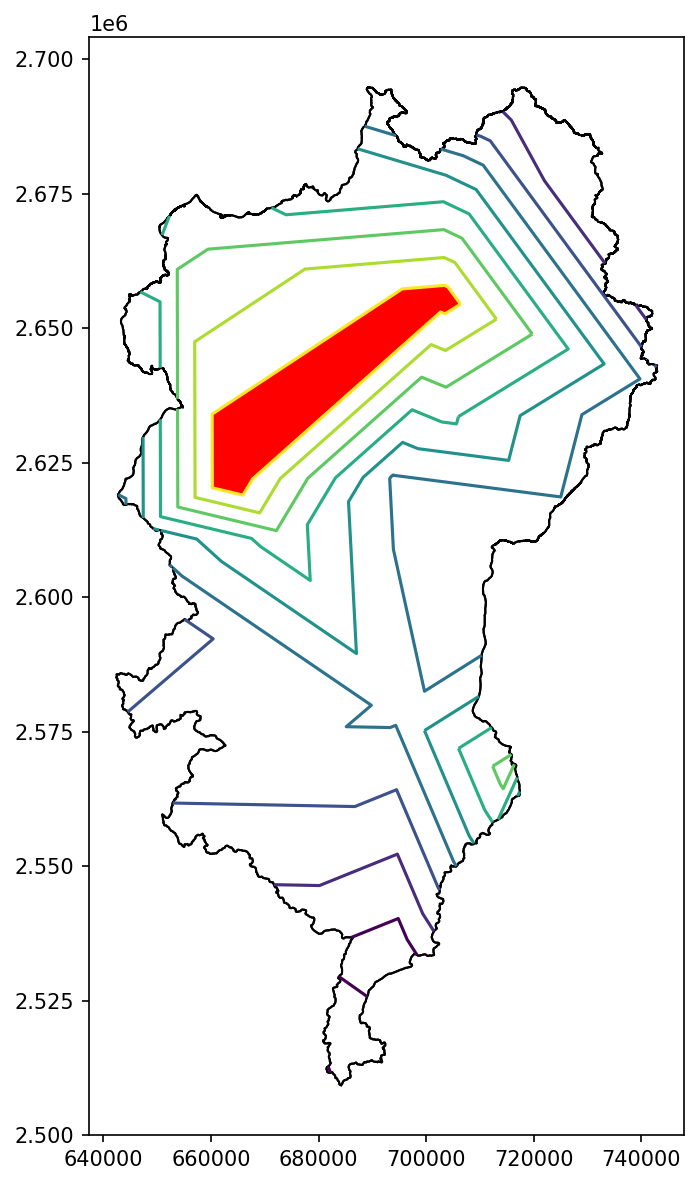

In [ ]:
# Polígonos de Thiessen + areas entre isoyetas.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

i = 0

# Graficamos la subcuenca.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos los polígonos de Thiessen.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las isoyetas.
subc_is.set_geometry(gdf_subc.loc[0, "CVE_SUBCUE"]
    ).plot("Precipitacion", ax = ax)
# Áreas las áreas entre isoyetas.
areas_is.loc[ [i] ].plot(ax = ax, color = "r", zorder = 0)

fig.tight_layout()
plt.show()

In [ ]:
# Calculamos la curva masa de las EMAs.

curva_masa = pre_emas.cumsum()

curva_masa

ZACATECAS  SANJUANDEGUADALUPE  LAFLORIDASMN  SOMBRERETE
fecha                                                                       
2013-09-15 15:00:00       0.00                 0.0           0.0        0.00
2013-09-15 16:00:00       0.00                 0.0           0.0        0.25
2013-09-15 17:00:00       0.00                 0.0           0.0        1.01
2013-09-15 18:00:00       0.00                 1.6           0.0        1.52
2013-09-15 19:00:00       0.00                 4.2           0.0        3.30
...                        ...                 ...           ...         ...
2013-09-18 00:00:00      79.44                96.0           0.0      102.07
2013-09-18 01:00:00      85.04                96.0           0.0      102.07
2013-09-18 02:00:00      88.60                96.0           0.0      102.07
2013-09-18 03:00:00      90.11                96.0           0.0      102.07
2013-09-18 04:00:00      90.11                96.0           0.0      102.07

[62 rows x 4 columns]

In [ ]:
# Curva masa media.

# Iteramos para todas las isoyetas.
for j in range( len(areas_na) ):

    # Iteramos para todos los polígonos de Thiessen.
    for i in range( subc_th.shape[0] ):
        # Precipitación por el área.
        curva_masa[f"{curva_masa.columns[i]}_Ath"] = ( curva_masa[
            f"{curva_masa.columns[i]}"] * subc_th.loc[i, areas_na[j]] )

    # Promedio ponderado por área de la precipitación.
    curva_masa[areas_n[j]] = ( curva_masa[
        [f"{curva_masa.columns[i]}_Ath" for i in range( subc_th.shape[0] ) ]
        ].sum(axis = 1) / subc_th[areas_na[j]].sum() * areas_is.loc[j, "Fa"] )

    # Quitamos las columnas de apoyo (precipitación por área).
    curva_masa = curva_masa.drop( [f"{curva_masa.columns[i]}_Ath"
        for i in range( subc_th.shape[0] ) ], axis = 1)

curva_masa

ZACATECAS  SANJUANDEGUADALUPE  LAFLORIDASMN  SOMBRERETE  \
fecha                                                                          
2013-09-15 15:00:00       0.00                 0.0           0.0        0.00   
2013-09-15 16:00:00       0.00                 0.0           0.0        0.25   
2013-09-15 17:00:00       0.00                 0.0           0.0        1.01   
2013-09-15 18:00:00       0.00                 1.6           0.0        1.52   
2013-09-15 19:00:00       0.00                 4.2           0.0        3.30   
...                        ...                 ...           ...         ...   
2013-09-18 00:00:00      79.44                96.0           0.0      102.07   
2013-09-18 01:00:00      85.04                96.0           0.0      102.07   
2013-09-18 02:00:00      88.60                96.0           0.0      102.07   
2013-09-18 03:00:00      90.11                96.0           0.0      102.07   
2013-09-18 04:00:00      90.11                96.0           0.0      102.07   

                        RH36Dc       IS_0       IS_1        IS_2        IS_3  \
fecha                                                                          
2013-09-15 15:00:00   0.000000   0.000000   0.000000    0.000000    0.000000   
2013-09-15 16:00:00   0.017242   0.017770   0.018218    0.017683    0.015803   
2013-09-15 17:00:00   0.069656   0.071793   0.073600    0.071438    0.063843   
2013-09-15 18:00:00   1.151165   1.186468   1.247809    1.356560    1.461151   
2013-09-15 19:00:00   2.974221   3.065433   3.225219    3.512165    3.791906   
...                        ...        ...        ...         ...         ...   
2013-09-18 00:00:00  85.539477  88.162737  92.743371   98.587594  104.616436   
2013-09-18 01:00:00  86.647627  89.304871  93.947590   99.745461  105.762680   
2013-09-18 02:00:00  87.352094  90.030942  94.713129  100.481534  106.491363   
2013-09-18 03:00:00  87.650899  90.338910  95.037838  100.793745  106.800439   
2013-09-18 04:00:00  87.650899  90.338910  95.037838  100.793745  106.800439   

                           IS_4        IS_5        IS_6        IS_7  \
fecha                                                                 
2013-09-15 15:00:00    0.000000    0.000000    0.000000    0.000000   
2013-09-15 16:00:00    0.017690    0.332335    0.334391    0.334431   
2013-09-15 17:00:00    0.071467    1.342632    1.350939    1.351101   
2013-09-15 18:00:00    1.533099    2.028200    2.033097    2.033340   
2013-09-15 19:00:00    3.975561    4.406782    4.413960    4.414487   
...                         ...         ...         ...         ...   
2013-09-18 00:00:00  111.695702  136.141945  136.525125  136.541430   
2013-09-18 01:00:00  113.030889  136.141945  136.525125  136.541430   
2013-09-18 02:00:00  113.879687  136.141945  136.525125  136.541430   
2013-09-18 03:00:00  114.239711  136.141945  136.525125  136.541430   
2013-09-18 04:00:00  114.239711  136.141945  136.525125  136.541430   

                           IS_8        IS_9       IS_10       IS_11  \
fecha                                                                 
2013-09-15 15:00:00    0.000000    0.000000    0.000000    0.000000   
2013-09-15 16:00:00    0.000000    0.000000    0.000000    0.000000   
2013-09-15 17:00:00    0.000000    0.000000    0.000000    0.000000   
2013-09-15 18:00:00    1.439857    1.689435    1.898975    2.181781   
2013-09-15 19:00:00    3.779626    4.434768    4.984808    5.727176   
...                         ...         ...         ...         ...   
2013-09-18 00:00:00  105.210777  118.214346  127.348698  139.909360   
2013-09-18 01:00:00  106.537417  119.402035  128.294031  140.543976   
2013-09-18 02:00:00  107.380781  120.157066  128.894993  140.947410   
2013-09-18 03:00:00  107.738500  120.477317  129.149895  141.118530   
2013-09-18 04:00:00  107.738500  120.477317  129.149895  141.118530   

                          IS_12  
fecha                            
2013-09-15 15:00:00    

In [ ]:
# Escogemos la curva masa media que corresponde a toda la subcuenca,
# ya que el programa en realidad está calculando para cada Ci.

curva_masa_m = curva_masa[ [gdf_subc.loc[0, 'CVE_SUBCUE']] ].rename(
    {gdf_subc.loc[0, 'CVE_SUBCUE']: "curva masa [mm]"}, axis = 1)

# Calculamos el delta de tiempo en horas.
dt = (curva_masa_m.index[1] - curva_masa_m.index[0]).seconds / 60 / 60

# Calculamos el hietograma.
curva_masa_m["hp [mm]"] = ( curva_masa_m["curva masa [mm]"]
    - curva_masa_m["curva masa [mm]"].shift(1) )
# Eliminamos esta línea porque la curva masa ya empieza en 0.
#curva_masa_m.loc[0.0, "hp [mm]"] = 0
curva_masa_m["i [mm/h]"] = curva_masa_m["hp [mm]"] / dt

# Guardamos el archivo.
curva_masa_m.to_csv(path + "curva_masa_media.csv")

curva_masa_m

curva masa [mm]   hp [mm]  i [mm/h]
fecha                                                   
2013-09-15 15:00:00         0.000000       NaN       NaN
2013-09-15 16:00:00         0.017242  0.017242  0.017242
2013-09-15 17:00:00         0.069656  0.052415  0.052415
2013-09-15 18:00:00         1.151165  1.081509  1.081509
2013-09-15 19:00:00         2.974221  1.823056  1.823056
...                              ...       ...       ...
2013-09-18 00:00:00        85.539477  1.737610  1.737610
2013-09-18 01:00:00        86.647627  1.108150  1.108150
2013-09-18 02:00:00        87.352094  0.704467  0.704467
2013-09-18 03:00:00        87.650899  0.298805  0.298805
2013-09-18 04:00:00        87.650899  0.000000  0.000000

[62 rows x 3 columns]

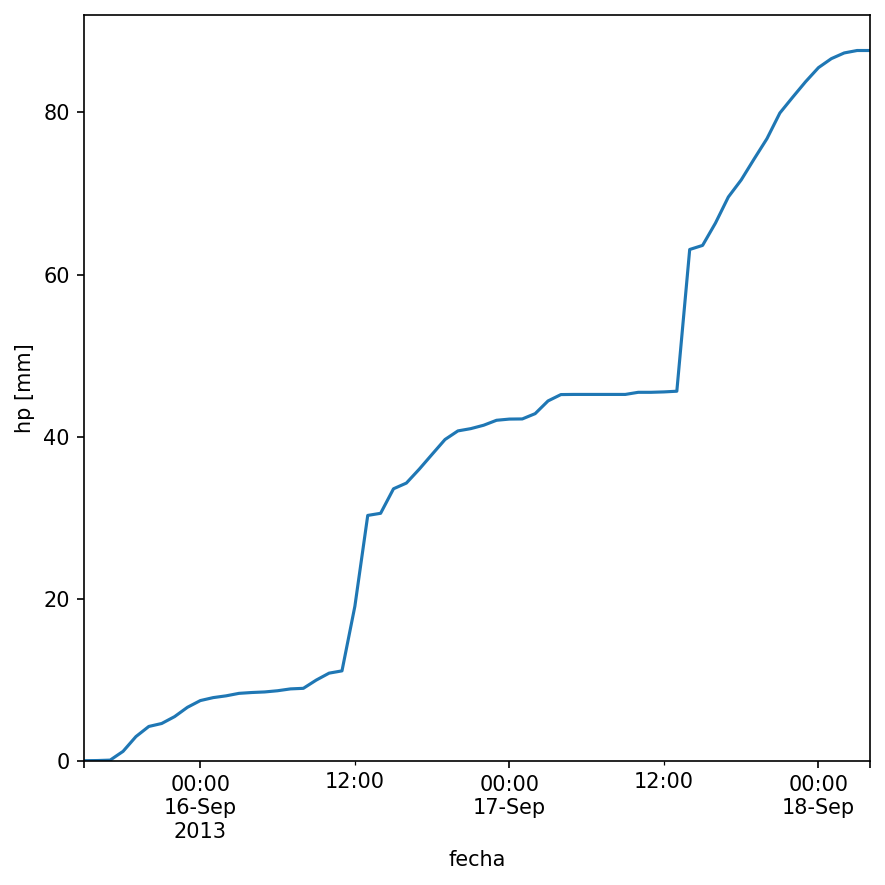

In [ ]:
# Curva masa.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos la curva masa.
curva_masa_m["curva masa [mm]"].plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")

fig.tight_layout()
plt.show()

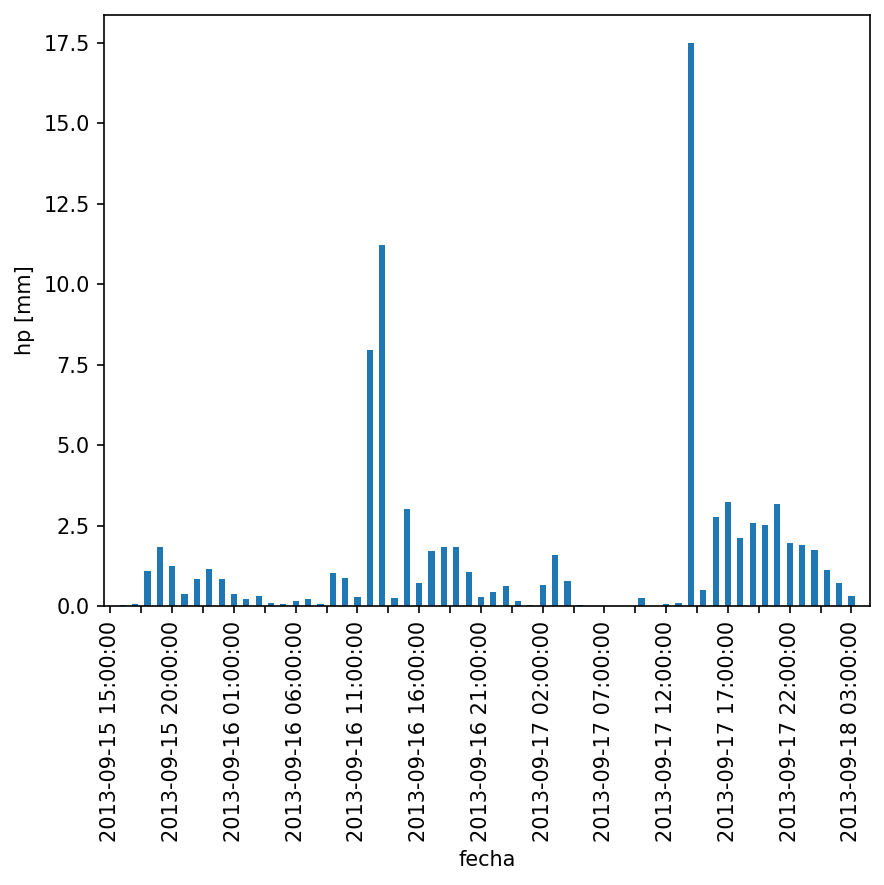

In [ ]:
# Hietograma.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos el hietograma.
curva_masa_m["hp [mm]"].plot.bar(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")
ax.xaxis.set_major_locator( plt.MaxNLocator(30) )

fig.tight_layout()
plt.show()